<a href="https://colab.research.google.com/github/Fardeen210/Fardeen_INFO5731_Fall2024/blob/main/Mohammed_Fardeen_Ali_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
import pandas as pd
file_path = '/content/drive/MyDrive/Dataset/IMDB Dataset.csv'

df = pd.read_csv(file_path, engine='python')

In [69]:
#In previous assiginment the review is cleaned and
data_sample = df.sample(1000)
data_sample = data_sample.drop(columns=['cleaned_Review'])
data_sample.head(10)

,Unnamed: 0,review,sentiment
36931,36931,A top contender for worst film ever made. Joan...,negative
44854,44854,It has been years since I have been privileged...,positive
21733,21733,I'd have to agree with the previous reviewer: ...,negative
14560,14560,Monstervision was a show I grew up with. From ...,positive
4982,4982,I cant believe it! I thought this is a good se...,negative
25638,25638,"It was the Sixties, and anyone with long hair ...",negative
4436,4436,well done giving the perspective of the other ...,positive
12398,12398,"I love the so-called ""blaxploitation"" films an...",negative
28928,28928,Mildly entertaining and self consciously cheez...,negative
43062,43062,"I'm a Don Johnson fan, but this is undoubtedly...",negative


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


data_sample['Cleaned_review'] = data_sample['review'].apply(clean_text)
data_sample.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Unnamed: 0,review,sentiment,Cleaned_review
14697,14697,One Chinese gang attacks and wipes out another...,negative,one chinese gang attacks wipes another gang be...
19477,19477,For those of you who think anime is just about...,positive,think anime giant reptiles raping schoolgirls ...
40705,40705,"Cinema, at its best is entertainment. If one i...",positive,cinema best entertainment one question every a...
4741,4741,The moral of this show is that bad eating habi...,negative,moral show bad eating habits give people bad h...
10367,10367,Hard to get in-depth with this kind of stuff s...,negative,hard get in depth kind stuff since absolutely ...


In [ ]:
# create a dictionary with the corpus
corpus = data_sample['Cleaned_review']
dictionary = corpora.Dictionary(corpus)

# convert corpus into a bag of words
bow = [dictionary.doc2bow(text) for text in corpus]

In [ ]:
from sklearn.decomposition import TruncatedSVD
from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer

'''Features (text representation) used for topic modeling.'''

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(data_sample['Cleaned_review'])

lsa = TruncatedSVD(n_components=10, random_state=42)
lsa_topics = lsa.fit_transform(tfidf_features)

In [ ]:
'''Top 10 clusters for topic modeling.'''

print("\nLSA Topics:")
for i, component in enumerate(lsa.components_):
    terms = [tfidf_vectorizer.get_feature_names_out()[j] for j in component.argsort()[-10:]]
    print(f"Topic {i + 1}: {', '.join(terms)}")


LSA Topics:
Topic 1: time, really, even, good, would, like, one, film, movie, br
Topic 2: difficult, match, humour, attention, small, begins, given, hal, moved, br
Topic 3: life, many, quite, music, wonderful, two, work, well, films, film
Topic 4: films, br, acting, terrible, plot, worst, horror, movie, bad, film
Topic 5: excellent, beautiful, wonderful, well, love, role, film, story, great, movie
Topic 6: shows, think, movie, ve, people, seen, see, funny, film, show
Topic 7: comedy, films, movies, man, ve, best, one, seen, ever, horror
Topic 8: script, cast, family, funny, good, best, acting, great, bad, show
Topic 9: man, young, gets, see, good, life, family, bad, horror, people
Topic 10: gore, creepy, music, terrible, characters, great, actors, plot, show, horror


In [ ]:
'''Summarize and describe the topic for each cluster.

Topic 1:General Opinion of the Movies

Topic 2: Themes of unique or challenging narratives

Topic 3: Life and Artistic Value in Films

Topic 4: Focuses on negative critiques of movies

Topic 5: Praise for Excellent Films

Topic 6:Relatability and Humor in Films

Topic 7:Covers popular genres

Topic 8:Acting, Scripts, and Family Entertainment

Topic 9:Character-Driven Stories

Topic 10: Polarizing audience reactions

'''

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Write your code here
data_sample.head()


,Unnamed: 0,review,sentiment,Cleaned_review
14697,14697,One Chinese gang attacks and wipes out another...,negative,one chinese gang attacks wipes another gang be...
19477,19477,For those of you who think anime is just about...,positive,think anime giant reptiles raping schoolgirls ...
40705,40705,"Cinema, at its best is entertainment. If one i...",positive,cinema best entertainment one question every a...
4741,4741,The moral of this show is that bad eating habi...,negative,moral show bad eating habits give people bad h...
10367,10367,Hard to get in-depth with this kind of stuff s...,negative,hard get in depth kind stuff since absolutely ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_sample['Cleaned_review'])
y = data_sample['sentiment']


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=42)

In [ ]:
# Train and evaluate different models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [ ]:
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Model: {name} \n")
    print(f"{name} Cross-Validation Scores: {cv_scores}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}\n")

Model: Naive Bayes 

Naive Bayes Cross-Validation Scores: [0.8     0.7375  0.76875 0.80625 0.83125]
Accuracy: 0.7500
Precision: 0.7966
Recall: 0.7500
F1-Score: 0.7477

Model: Logistic Regression 

Logistic Regression Cross-Validation Scores: [0.8375  0.78125 0.85625 0.88125 0.83125]
Accuracy: 0.8200
Precision: 0.8239
Recall: 0.8200
F1-Score: 0.8207

Model: SVM 

SVM Cross-Validation Scores: [0.85625 0.7875  0.875   0.86875 0.84375]
Accuracy: 0.8500
Precision: 0.8505
Recall: 0.8500
F1-Score: 0.8502

Model: Random Forest 

Random Forest Cross-Validation Scores: [0.7625  0.73125 0.75625 0.875   0.83125]
Accuracy: 0.8050
Precision: 0.8098
Recall: 0.8050
F1-Score: 0.8058



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [2]:
import pandas as pd
train_file_path = '/content/drive/MyDrive/Dataset/train.csv'
test_file_path = '/content/drive/MyDrive/Dataset/test.csv'

df_train = pd.read_csv(train_file_path, engine='python')
df_test = pd.read_csv(test_file_path, engine='python')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
#There are Categorical and Numerial values.

numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_train.select_dtypes(include=['object']).columns

In [6]:
numeric_features, categorical_features

(Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    

In [7]:
# Handle missing values in numeric columns
for col in numeric_features:
    df_train[col] = df_train[col].fillna(df_train[col].mean())

# Handle missing values in categorical columns
for col in categorical_features:
    df_train[col] = df_train[col].fillna('None')

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_features:
    df_train[col] = le.fit_transform(df_train[col])

In [ ]:
# I am perfomring regression in which response variable is  overallqUal i.e OverallQual: Rates the overall material and finish of the house
# So finding top 6   variables which determine overallqual which helps in finding best house and easy to judge the house

In [9]:
correlation = df_train.corr()['OverallQual'].sort_values(ascending=False)

In [10]:
print(correlation.head(7))

OverallQual     1.000000
SalePrice       0.790982
GarageCars      0.600671
GrLivArea       0.593007
YearBuilt       0.572323
GarageArea      0.562022
YearRemodAdd    0.550684
Name: OverallQual, dtype: float64


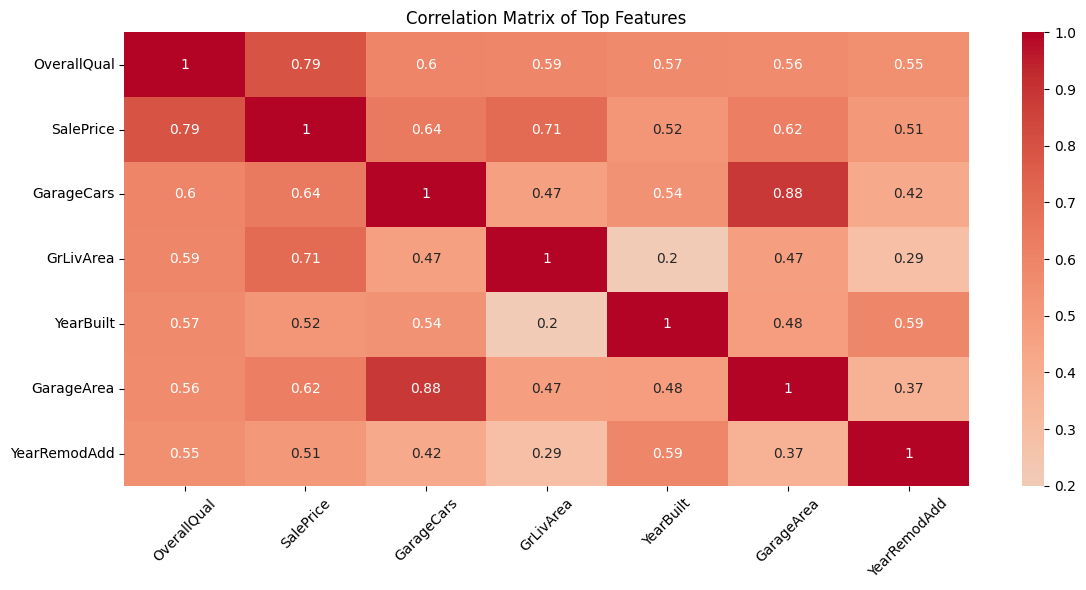

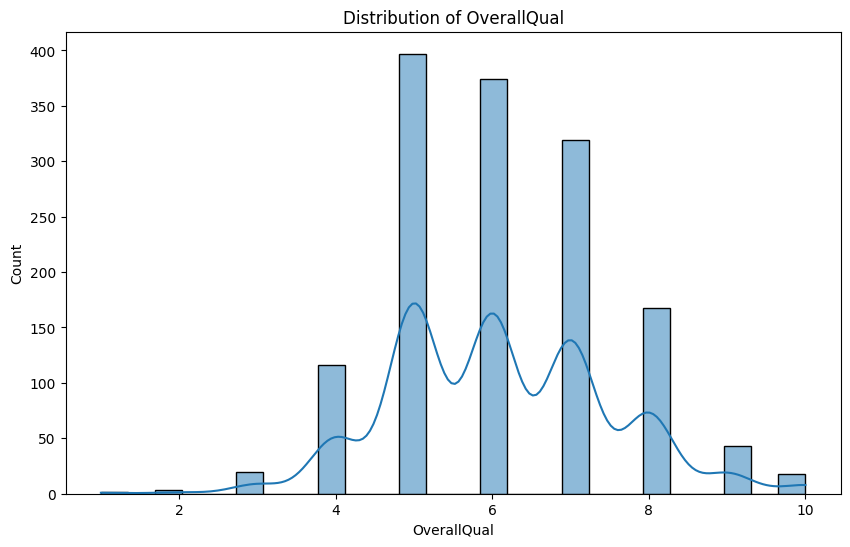

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize top correlations
plt.figure(figsize=(12, 6))
correlation_matrix = df_train[correlation.head(7).index].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_train['OverallQual'], kde=True)
plt.title('Distribution of OverallQual')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [37]:
selected_features = ['Id','YearRemodAdd','GrLivArea', 'GarageCars', 'GarageArea','YearBuilt']

features_df = df_train[selected_features]
features_df_testing = df_test[selected_features].fillna(0)

targted_df = df_train['OverallQual']

In [38]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(features_df, targted_df, test_size=0.2, random_state=42)

In [39]:
# i choosed linear_regression  model and trained
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
test_targted_df = df_test['OverallQual']
X1_train, X1_test, y1_train, y1_test = train_test_split(features_df_testing, test_targted_df, test_size=0.2, random_state=42)

In [64]:
y_test_pred = model.predict(X1_train)

In [65]:
''' The model is trained and tested'''
test_predictions = pd.DataFrame({
    'Id': X1_train['Id'],
    'OverallQualification': y_test_pred
})

In [66]:
print(test_predictions.head())

        Id  OverallQualification
254   1715              6.921897
1065  2526              5.611991
864   2325              6.819677
798   2259              6.609710
380   1841              5.430827


In [46]:
print('Linear Regression R squared": %.4f' % model.score(X_test, y_test))

Linear Regression R squared": 0.6719


In [67]:
import numpy as np
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test_pred, y1_train)

lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 0.9288


(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
''' 1) PLM : nlptown/bert-base-multilingual-uncased-sentiment
        Info: This model is a bert based multilingual-uncased model fintuned for sentiment analysis
        on product reviews in six languages
        In english language it has around 67% accuracy
        Over 150k reviews are used in pre training

In [70]:
#2
from transformers import pipeline

specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

In [114]:
true_label = data_sample['sentiment'][:3].tolist()

In [105]:
# Truncate reviews to 512 characters
sample_reviews1 = data_sample['review'][:3].tolist()
# Convert to list
reviews = data_sample['review'].tolist()

In [106]:
PLM_Results = specific_model(sample_reviews1)

In [115]:
predicted_labels = [result['label'] for result in PLM_Results]
for review, result in zip(sample_reviews1, PLM_Results):
    print(f"Review: {review}")
    print(f"Sentiment: {result['label']}, Score: {result['score']:.2f}\n")

Review: A top contender for worst film ever made. Joanna Pakula's character seems to have an I.Q. of 3 which is only one less than the writer and director. The screenplay would not have passed in a high school writing class; the "jokes" are juvenile; the concept corny. These performers were obviously desperate for work. I stayed to the end only to see if it would get worse. It did. Life is too short to spend any part of it watching this film.
Sentiment: NEG, Score: 0.97

Review: It has been years since I have been privileged to see this movie on TV. I only wish I could contact someone to see it again. I married a man with three children and two had Fetal Alcohol Syndrome. I didn't' realize this but seeing this movie helped me understand more about their problems and more about how I can love them and help them overcome their difficulties. My step-son is now 35 and thank the Lord he has blossomed wonderfully but still has many after affects of being born by an alcoholic mother. We s
Sen

In [125]:
# Mapping from predicted labels to true labels
label_mapping = {
    "POS": "negative",
    "NEG": "negative",
    "neutral": "NEUTRAL"  # Add more mappings if necessary
}
mapped_predicted_labels = [label_mapping[label] for label in predicted_labels]

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(true_label, mapped_predicted_labels)
precision = precision_score(true_label, mapped_predicted_labels, average='weighted')
recall = recall_score(true_label, mapped_predicted_labels, average='weighted')
f1 = f1_score(true_label, mapped_predicted_labels, average='weighted')

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.67
Precision: 0.44
Recall: 0.67
F1-score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
''' Challenge is that it allowrd me only three input only becuse of token length.
but response time is fast '''